# Shannon Entropy

$ H(S) = - ( \sum_{k=1}^{N} pi \cdot log{_2}{pi} ) $

Calculate of Shannon Entropy of name processes.

In [1]:
! pip install jupyter_contrib_nbextensions matplotlib scipy

  Using cached jupyter_contrib_nbextensions-0.5.1-py2.py3-none-any.whl (20.9 MB)
  Using cached jupyter_contrib_core-0.3.3-py2.py3-none-any.whl (18 kB)
  Using cached jupyter_nbextensions_configurator-0.4.1.tar.gz (479 kB)
  Using cached jupyter_highlight_selected_word-0.2.0-py2.py3-none-any.whl (11 kB)
  Using cached jupyter_latex_envs-1.4.6.tar.gz (861 kB)
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963415 sha256=297e787b525bb7e5d8ddae44edc67436cb3040c16cc452e24c8d1bd1cc454c3c
  Stored in directory: c:\users\nilson\appdata\local\pip\cache\wheels\f7\b5\78\f5b899dd8fc137fe0bfe26b382713f6d171c9eac2fb1fa091f
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465842 sha256=9b67d5db1b95cabdf32a7812fa069ad167ab1b386b1c0e42e19a237a9e19af99
  Stored in directory: c:\users\nilson\appdata\local\pip\cache\wheels\94\62\cd\233da8580d4e1228ab3fbede758ab1b97174bf9d9c

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

# read CSV dataset
data_path = "Server2016-29-12-2021-1500-2300.csv"
data = pd.read_csv(data_path)
data.shape

(10000, 107)

In [3]:
pd.set_option("max_rows", 1000)
# data['_source.data.osquery.columns.name'] == "taskdl.exe"

$ H(S) = - ( \sum_{k=1}^{N} pi \cdot log{_2}{pi} ) $

In [4]:
import math
sum = 0
processName = data['_source.data.osquery.columns.filename'].iloc[7]
uniq_c = ''.join(set(processName))
for c in uniq_c:
    # print("pi from character", c, "is", processName.count(c))
    pi = processName.count(c) / len(processName)
    sum += pi * math.log(pi,2)
print("H(S) =", -sum)

H(S) = 3.3213235015177425


Passo 1: Criar uma função Entropia().
Passo 2: Criar dataset com nomes dos processos, excluindo as linhas em branco.
Passo 3: Armazenar os valores da entropia de cada item do dataset.
Passo 4: Criar um histograma das entropias.
Passo 4.a: (opcional) criar regressão de uma função de probabilidade, por exemplo, é possível verificar que o valor das entropias corresponde a uma distribuição normal de média x e dispersão N.
Passo 5: Criar dataset com os nomes dos executáveis dos malwares.
Passo 6.1: verificar os nomes reais dos nomes dos processos gerados por cada malware.
Passo 6.2: verificação se os processos gerados são nativos do malware ou se são executáveis do próprio SO.
Passo 7: Passar cada um para a função entropia; analisar quão diferente é o valor da entropia, em comparação ao resultado do passo 4.
Passo 8: Fazer pseudocódigo do processo de aprendizado. (até a fase de monitoramento, até obter o modelo, passo 4.a)
Passo 9: fazer pseudocódigo do processo de inferência. (chegada uma nova amostra, como realizar a verificação.)

In [5]:
# Entropy Function
def ShannonEntropy(processName):
    uniqCaracters = ''.join(set(processName))
    sum = 0
    for c in uniqCaracters:
        # print("Process name:", processName, "uniqCaracters:", uniqCaracters, "c:", c, "e sum:", sum)
        pi = processName.count(c) / len(processName)
        sum += pi * math.log(pi,2)
    return -sum

In [6]:
ShannonEntropy("scvhost.exe")

3.0957952550009344

In [7]:
# Dataset with process names, without blanck lines.
df = pd.DataFrame()
df['processName'] = data['_source.data.osquery.columns.filename']
df['processName'].replace(' ', np.nan, inplace=True)
df.dropna(subset=['processName'], inplace=True)
df

,processName
0,SPLUNK-NETMON.EXE
1,SPLUNK-WINPRINTMON.EXE
2,SEARCHUI.EXE
3,AUDIODG.EXE
4,DLLHOST.EXE
...,...
9540,TASKHOSTW.EXE
9541,GOOGLEUPDATE.EXE
9542,INSTALLAGENT.EXE
9543,SPPSVC.EXE


In [20]:
# Store entropy values of each dataset item.
for index, row in df.iterrows():
    df.loc[index,'entropy'] = ShannonEntropy(df.loc[index,'processName'])

In [21]:
df

,processName,entropy
0,SPLUNK-NETMON.EXE,3.528064
1,SPLUNK-WINPRINTMON.EXE,3.823068
2,SEARCHUI.EXE,3.188722
3,AUDIODG.EXE,3.095795
4,DLLHOST.EXE,3.095795
...,...,...
9540,TASKHOSTW.EXE,3.238901
9541,GOOGLEUPDATE.EXE,3.250000
9542,INSTALLAGENT.EXE,3.202820
9543,SPPSVC.EXE,2.721928


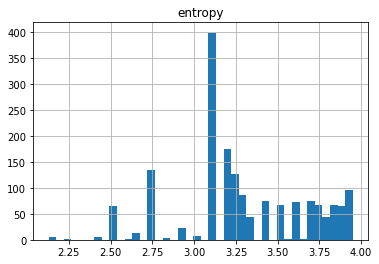

In [22]:
# Histogram of entropies from all executables
hist = df.hist(bins=40)

(76, 2)


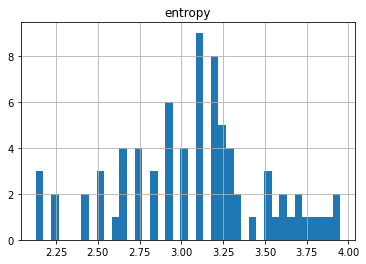

In [23]:
# Histogram of entropies from all executables, without duplicate lines
data_nodup = df.drop_duplicates(subset=['processName'])
print(data_nodup.shape)
hist = data_nodup.hist(bins=40)

In [8]:
# Dataset with malware executable names
malwares = pd.read_csv('ransomware_process_names.csv')
for index, row in malwares.iterrows():
    malwares.loc[index,'entropy'] = ShannonEntropy(malwares.loc[index,'executableName'])
malwares

,ransomware,executableName,path,entropy
0,Crysis,AAAASSSSS(och).exe,c:\Users\leonardototvs\Desktop\AAAASSSSS(och).exe,2.969389
1,Crysis,SETAP2.EXE,NaN,2.846439
2,Djvu,28E6.TMP.EXE,NaN,3.022055
3,Djvu,3FE.tmp.exe,NaN,3.095795
4,Djvu,3DCB.tmp.exe,NaN,3.251629
5,Djvu,4375.tmp.exe,NaN,3.251629
6,Gandcrab,GC44.exe,NaN,2.500000
7,Revil,myfile.exe,NaN,3.027169
8,Revil,33.exe,NaN,1.918296
9,TeslaCrypt,jnxecok.exe,NaN,2.845351


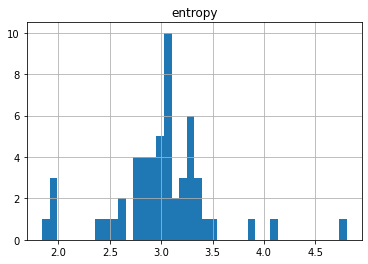

In [25]:
# Histogram of entropies from malware executables
hist = malwares.hist(bins=40)

<AxesSubplot:ylabel='Density'>

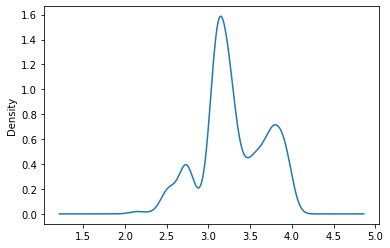

In [26]:
df['entropy'].plot.density()

<AxesSubplot:ylabel='Density'>

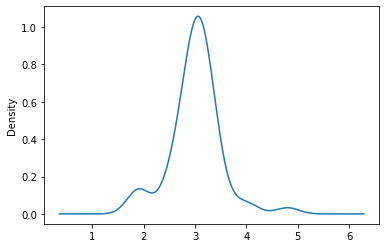

In [27]:
malwares['entropy'].plot.density()